# Diabetes Predicting

### This task is supposed to check and predict the presence or absence of diabetes. Finally, the best of best and worst of worse regression models have been selected for prediction.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## data preview

In [3]:
raw_data = pd.read_csv("diabetes datasets\diabetes_binary_health_indicators_BRFSS2015.csv")

In [4]:
raw_data.head(10)

Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0              0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1              0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2              0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3              0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4              0.0     1.0       1.0        1.0  24.0     0.0     0.0   
5              0.0     1.0       1.0        1.0  25.0     1.0     0.0   
6              0.0     1.0       0.0        1.0  30.0     1.0     0.0   
7              0.0     1.0       1.0        1.0  25.0     1.0     0.0   
8              1.0     1.0       1.0        1.0  30.0     1.0     0.0   
9              0.0     0.0       0.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   
5                   0.0           1.0     1.0  ...            1.0   
6                   0.0           0.0     0.0  ...            1.0   
7                   0.0           1.0     0.0  ...            1.0   
8                   1.0           0.0     1.0  ...            1.0   
9                   0.0           0.0     0.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0       1.0  0.0   9.0        4.0   
1          1.0      3.0       0.0       0.0       0.0  0.0   7.0        6.0   
2          1.0      5.0      30.0      30.0       1.0  0.0   9.0        4.0   
3          0.0      2.0       0.0       0.0       0.0  0.0  11.0        3.0   
4          0.0      2.0       3.0       0.0       0.0  0.0  11.0        5.0   
5          0.0      2.0       0.0       2.0       0.0  1.0  10.0        6.0   
6          0.0      3.0       0.0      14.0       0.0  0.0   9.0        6.0   
7          0.0      3.0       0.0       0.0       1.0  0.0  11.0        4.0   
8          0.0      5.0      30.0      30.0       1.0  0.0   9.0        5.0   
9          0.0      2.0       0.0       0.0       0.0  1.0   8.0        4.0   

   Income  
0     3.0  
1     1.0  
2     8.0  
3     6.0  
4     4.0  
5     8.0  
6     7.0  
7     4.0  
8     1.0  
9     3.0  

[10 rows x 22 columns]

In [5]:
raw_data.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

### isNull?

#### According to the following result, there is no null data in this dataframe:

In [6]:
raw_data.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

#### All data is converted from float to int:

In [7]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [8]:
data = raw_data.copy() 

for d in raw_data:
    data[d] = raw_data[d].astype(int)
    
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_binary       253680 non-null  int32
 1   HighBP                253680 non-null  int32
 2   HighChol              253680 non-null  int32
 3   CholCheck             253680 non-null  int32
 4   BMI                   253680 non-null  int32
 5   Smoker                253680 non-null  int32
 6   Stroke                253680 non-null  int32
 7   HeartDiseaseorAttack  253680 non-null  int32
 8   PhysActivity          253680 non-null  int32
 9   Fruits                253680 non-null  int32
 10  Veggies               253680 non-null  int32
 11  HvyAlcoholConsump     253680 non-null  int32
 12  AnyHealthcare         253680 non-null  int32
 13  NoDocbcCost           253680 non-null  int32
 14  GenHlth               253680 non-null  int32
 15  MentHlth              253680 non-n

In [9]:
data["Diabetes_binary"].value_counts()

0    218334
1     35346
Name: Diabetes_binary, dtype: int64

### for this reason, duplicated data not drop

<!-- #### duplicate = data[data.duplicated()]
#### duplicate
#### print("Duplicate rows : ",len(duplicate)) -->
#### data.drop_duplicates(inplace=True)

## Data visualization

In [10]:
corrdf = data.corr(numeric_only=True)

<AxesSubplot: >

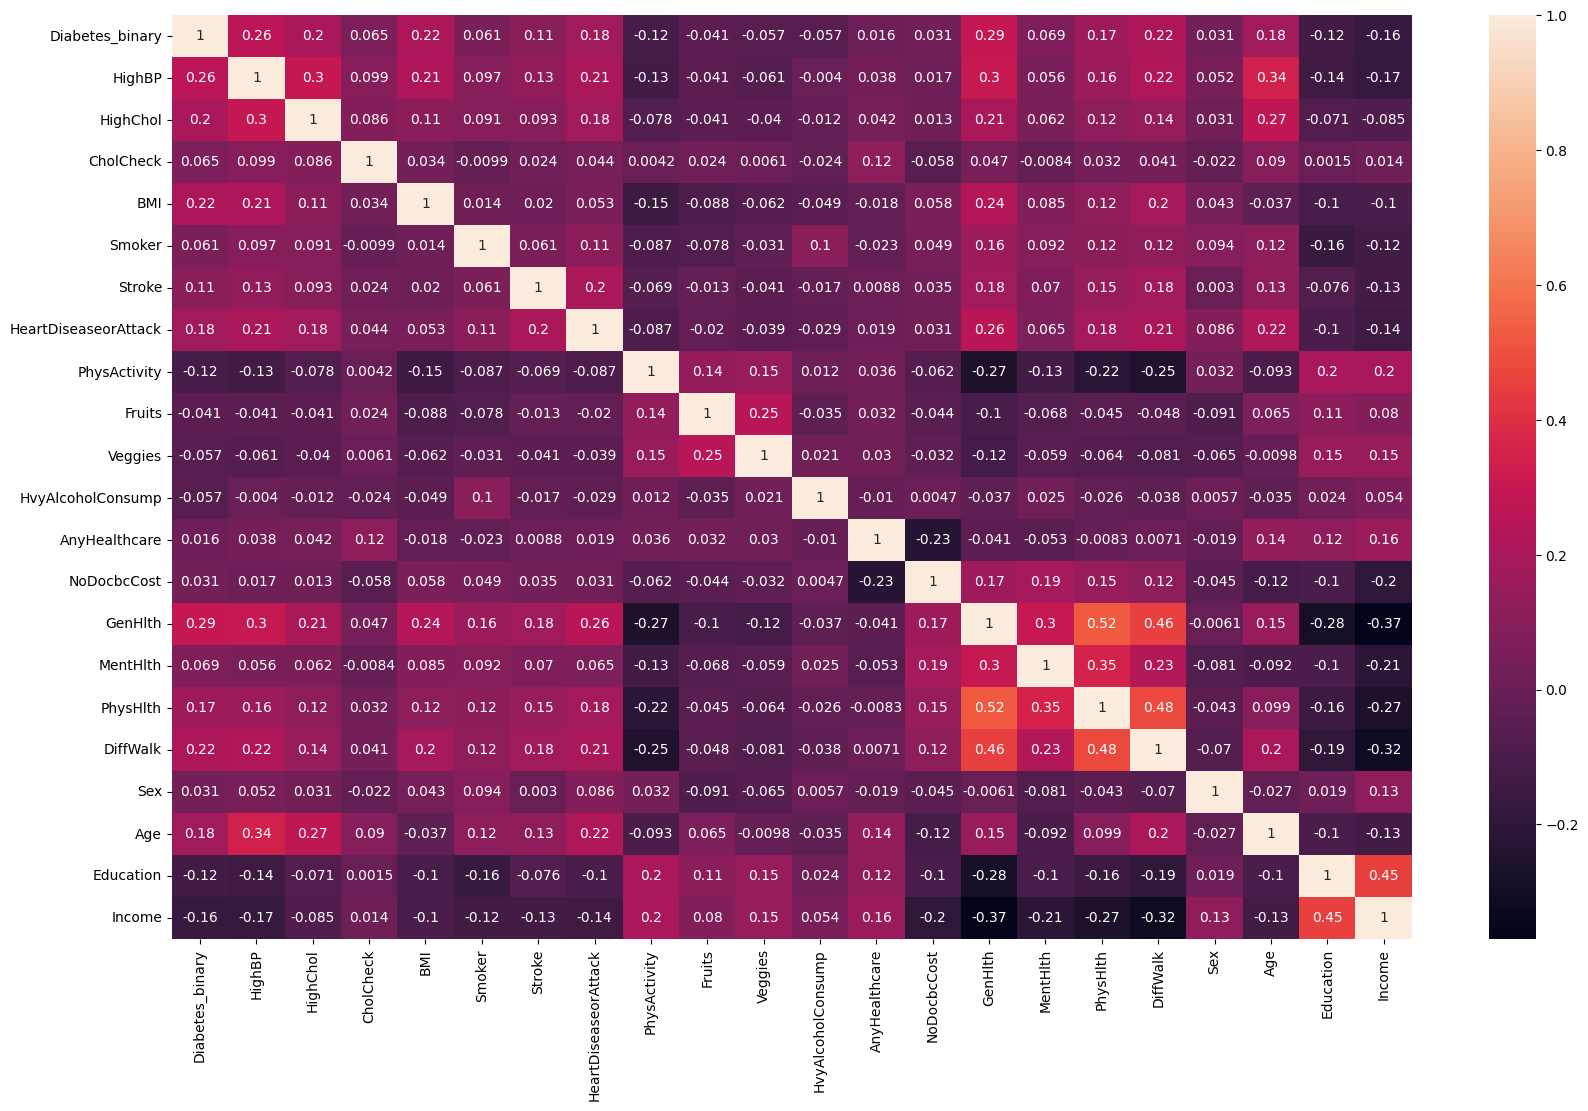

In [11]:
plt.figure(figsize=(20,12))
sns.heatmap(corrdf, annot=True)

In [12]:
corrdf.sort_values(by=['Diabetes_binary'], ascending=False)['Diabetes_binary']

Diabetes_binary         1.000000
GenHlth                 0.293569
HighBP                  0.263129
DiffWalk                0.218344
BMI                     0.216843
HighChol                0.200276
Age                     0.177442
HeartDiseaseorAttack    0.177282
PhysHlth                0.171337
Stroke                  0.105816
MentHlth                0.069315
CholCheck               0.064761
Smoker                  0.060789
NoDocbcCost             0.031433
Sex                     0.031430
AnyHealthcare           0.016255
Fruits                 -0.040779
Veggies                -0.056584
HvyAlcoholConsump      -0.057056
PhysActivity           -0.118133
Education              -0.124456
Income                 -0.163919
Name: Diabetes_binary, dtype: float64

#### The Plot of some of the data that have the most and least impact on diabetes according to the above heatmap is reviewed below:

### HighBP & HighChol

<AxesSubplot: xlabel='HighBP', ylabel='count'>

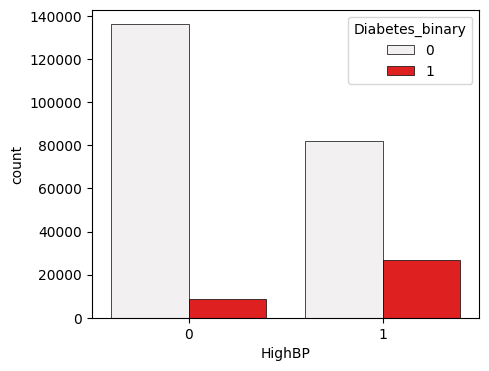

In [13]:
plt.figure(figsize=(5,4))
sns.countplot(data=data, x="HighBP", hue="Diabetes_binary", lw=0.5, ec="black", color="red")

<AxesSubplot: xlabel='HighChol', ylabel='count'>

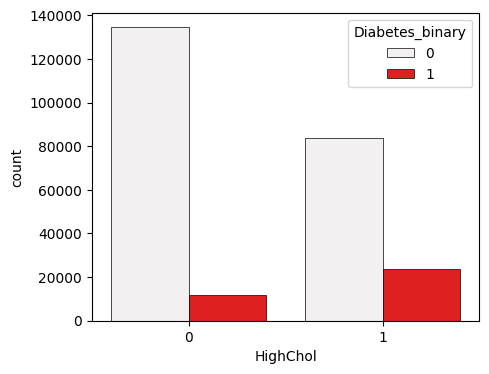

In [14]:
plt.figure(figsize=(5,4))
sns.countplot(data=data, x="HighChol", hue="Diabetes_binary", lw=0.5, ec="black", color="red")

<AxesSubplot: xlabel='HighBP', ylabel='HighChol'>

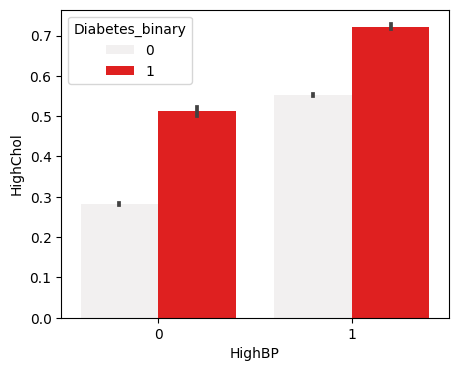

In [15]:
plt.figure(figsize=(5,4))
sns.barplot(x='HighBP',y='HighChol',data=data, hue='Diabetes_binary', color='red')

#### if have Diabetes:

In [16]:
len(data[(data['Diabetes_binary'] == 1) & (data['HighBP'] == 1) & (data['HighChol'] == 1)])

19213

In [17]:
len(data[(data['Diabetes_binary'] == 1) & (data['HighBP'] == 0) & (data['HighChol'] == 0)])

4269

#### if have not Diabetes:

In [18]:
len(data[(data['Diabetes_binary'] == 0) & (data['HighBP'] == 1) & (data['HighChol'] == 1)])

45447

In [19]:
len(data[(data['Diabetes_binary'] == 0) & (data['HighBP'] == 0) & (data['HighChol'] == 0)])

97651

#### Considering Age:

In [20]:
Under50 = data[data['Age'] < 7]
Higher50 = data[data['Age'] >= 7]

<AxesSubplot: xlabel='HighBP', ylabel='count'>

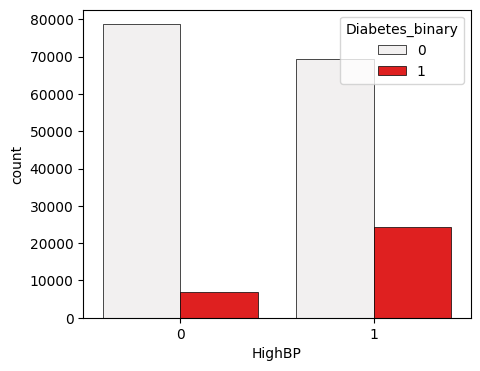

In [21]:
fig = plt.figure(figsize=(5,4))
sns.countplot(data=Higher50, x="HighBP", hue="Diabetes_binary", lw=0.5, ec="black", color="red")

<AxesSubplot: xlabel='HighBP', ylabel='count'>

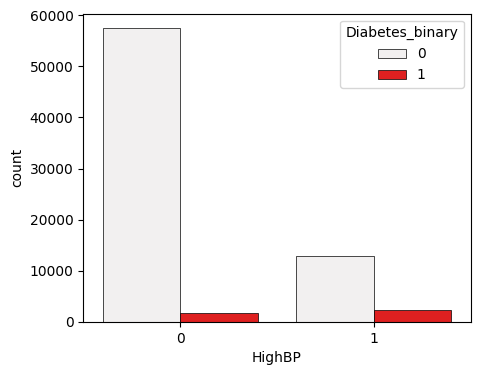

In [22]:
plt.figure(figsize=(5,4))
sns.countplot(data=Under50, x="HighBP", hue="Diabetes_binary", lw=0.5, ec="black", color="red")

In [23]:
len(data[(data['Diabetes_binary'] == 1) & (data['HighBP'] == 1) & (data['HighChol'] == 1) & (data['Age'] < 7 )])

1513

In [24]:
len(data[(data['Diabetes_binary'] == 1) & (data['HighBP'] == 1) & (data['HighChol'] == 1) & (data['Age'] >= 7 )])

17700

### Smoke & HvyAlcoholConsump

<AxesSubplot: xlabel='Smoker', ylabel='count'>

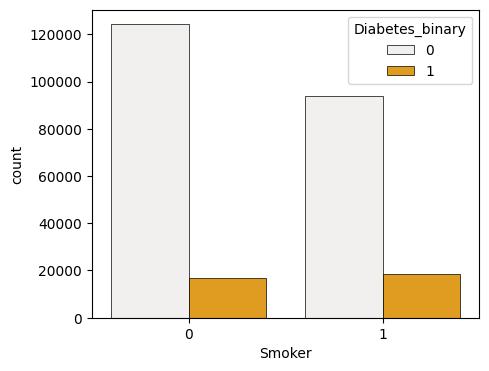

In [25]:
plt.figure(figsize=(5,4))
sns.countplot(data=data, x="Smoker", hue="Diabetes_binary", lw=0.5, ec="black", color="orange")

<AxesSubplot: xlabel='Smoker', ylabel='HvyAlcoholConsump'>

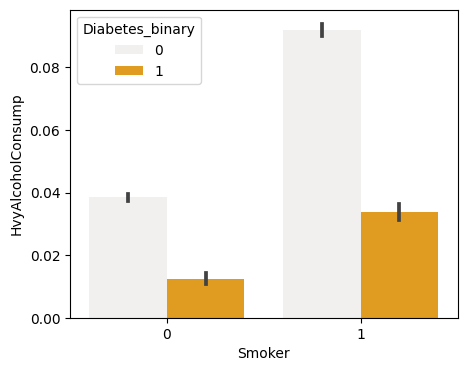

In [26]:
plt.figure(figsize=(5,4))
sns.barplot(x='Smoker',y='HvyAlcoholConsump',data=data, hue='Diabetes_binary', color='orange')

#### if have Diabetes:

In [27]:
len(data[(data['Diabetes_binary'] == 1) & (data['Smoker'] == 1) & (data['HvyAlcoholConsump'] == 1)])

619

In [28]:
len(data[(data['Diabetes_binary'] == 1) & (data['Smoker'] == 0) & (data['HvyAlcoholConsump'] == 0)])

16816

#### if have not Diabetes:

In [29]:
len(data[(data['Diabetes_binary'] == 0) & (data['Smoker'] == 1) & (data['HvyAlcoholConsump'] == 1)])

8648

In [30]:
len(data[(data['Diabetes_binary'] == 0) & (data['Smoker'] == 0) & (data['HvyAlcoholConsump'] == 0)])

119452

#### Considering Age

<AxesSubplot: xlabel='Smoker', ylabel='count'>

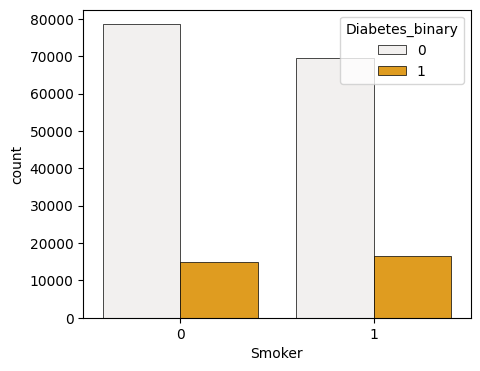

In [31]:
plt.figure(figsize=(5,4))
sns.countplot(data=Higher50, x="Smoker", hue="Diabetes_binary", lw=0.5, ec="black", color="orange")

<AxesSubplot: xlabel='Smoker', ylabel='count'>

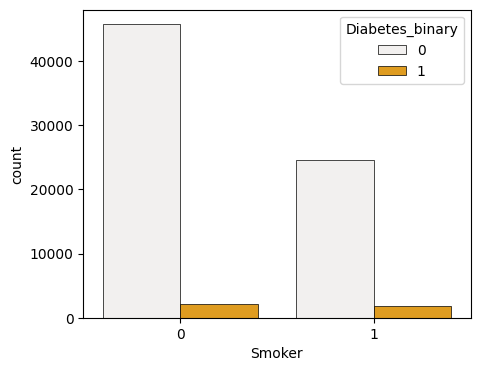

In [32]:
plt.figure(figsize=(5,4))
sns.countplot(data=Under50, x="Smoker", hue="Diabetes_binary", lw=0.5, ec="black", color="orange")

In [33]:
len(data[(data['Diabetes_binary'] == 1) & (data['Smoker'] == 1) & (data['HvyAlcoholConsump'] == 1) & (data['Age'] < 7 )])

117

In [34]:
len(data[(data['Diabetes_binary'] == 1) & (data['Smoker'] == 1) & (data['HvyAlcoholConsump'] == 1) & (data['Age'] >= 7 )])

502

### Stroke & HeartDiseaseorAttack

<AxesSubplot: xlabel='Stroke', ylabel='count'>

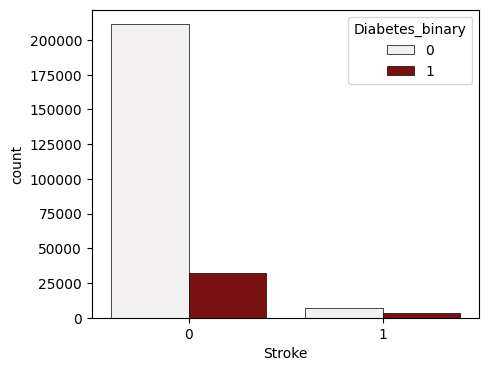

In [35]:
plt.figure(figsize=(5,4))
sns.countplot(data=data, x="Stroke", hue="Diabetes_binary", lw=0.5, ec="black", color="darkred")

<AxesSubplot: xlabel='HeartDiseaseorAttack', ylabel='count'>

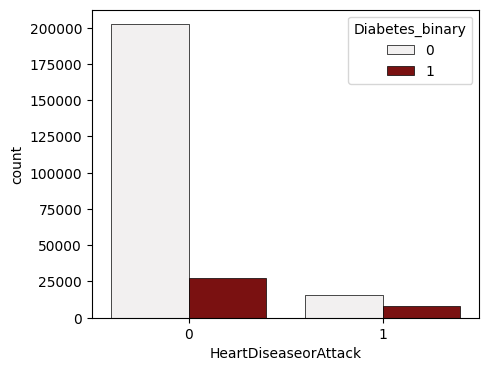

In [36]:
plt.figure(figsize=(5,4))
sns.countplot(data=data, x="HeartDiseaseorAttack", hue="Diabetes_binary", lw=0.5, ec="black", color="darkred")

<AxesSubplot: xlabel='Stroke', ylabel='HeartDiseaseorAttack'>

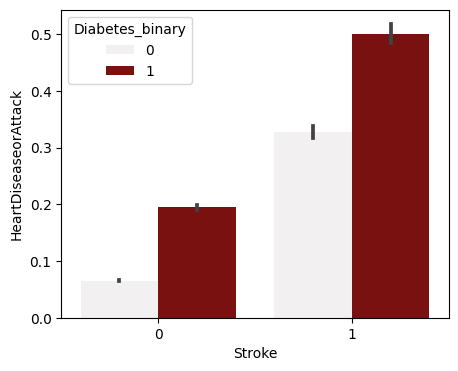

In [37]:
plt.figure(figsize=(5,4))
sns.barplot(x='Stroke',y='HeartDiseaseorAttack',data=data, hue='Diabetes_binary', color='darkred')

#### if have Diabetes:

In [38]:
len(data[(data['Diabetes_binary'] == 1) & (data['Stroke'] == 1) & (data['HeartDiseaseorAttack'] == 1)])

1636

In [39]:
len(data[(data['Diabetes_binary'] == 1) & (data['Stroke'] == 0) & (data['HeartDiseaseorAttack'] == 0)])

25836

#### if have not Diabetes:

In [40]:
len(data[(data['Diabetes_binary'] == 0) & (data['Stroke'] == 1) & (data['HeartDiseaseorAttack'] == 1)])

2301

In [41]:
len(data[(data['Diabetes_binary'] == 0) & (data['Stroke'] == 0) & (data['HeartDiseaseorAttack'] == 0)])

197596

#### Considering Age:

<AxesSubplot: xlabel='Stroke', ylabel='count'>

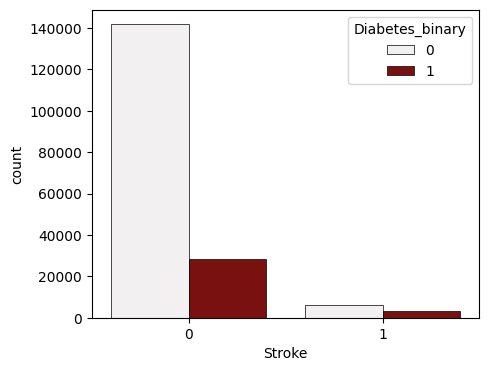

In [42]:
plt.figure(figsize=(5,4))
sns.countplot(data=Higher50, x="Stroke", hue="Diabetes_binary", lw=0.5, ec="black", color="darkred")

<AxesSubplot: xlabel='Stroke', ylabel='count'>

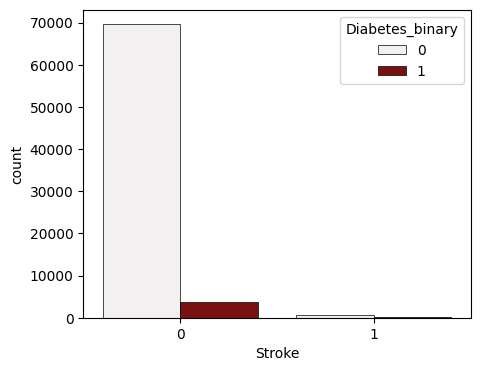

In [43]:
plt.figure(figsize=(5,4))
sns.countplot(data=Under50, x="Stroke", hue="Diabetes_binary", lw=0.5, ec="black", color="darkred")

In [44]:
len(data[(data['Diabetes_binary'] == 1) & (data['Stroke'] == 1) & (data['HeartDiseaseorAttack'] == 1) & (data['Age'] < 7 )])

78

In [45]:
len(data[(data['Diabetes_binary'] == 1) & (data['Stroke'] == 1) & (data['HeartDiseaseorAttack'] == 1) & (data['Age'] >= 7 )])

1558

### Fruits & Veggies

<AxesSubplot: xlabel='Fruits', ylabel='count'>

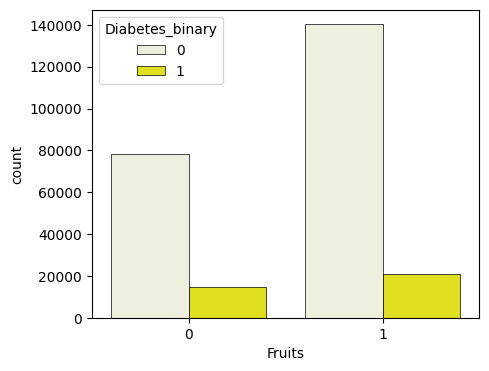

In [46]:
plt.figure(figsize=(5,4))
sns.countplot(data=data, x="Fruits", hue="Diabetes_binary", lw=0.5, ec="black", color="yellow")

<AxesSubplot: xlabel='Veggies', ylabel='count'>

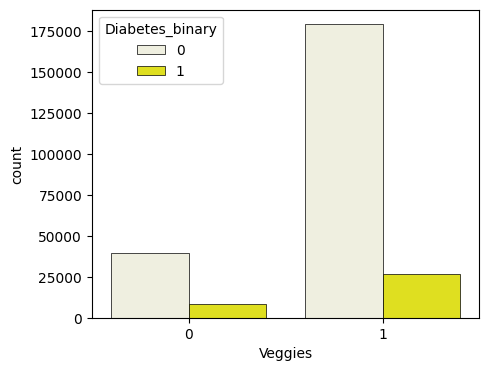

In [47]:
plt.figure(figsize=(5,4))
sns.countplot(data=data, x="Veggies", hue="Diabetes_binary", lw=0.5, ec="black", color="yellow")

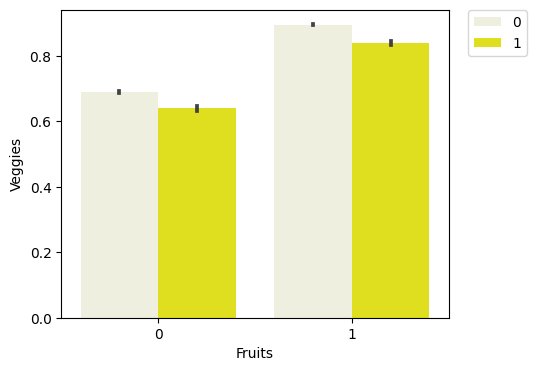

In [48]:
plt.figure(figsize=(5,4))
sns.barplot(x='Fruits',y='Veggies',data=data, hue='Diabetes_binary', color='yellow')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#### if have Diabetes:

In [49]:
len(data[(data['Diabetes_binary'] == 1) & (data['Fruits'] == 1) & (data['Veggies'] == 1)])

17357

In [50]:
len(data[(data['Diabetes_binary'] == 1) & (data['Fruits'] == 0) & (data['Veggies'] == 0)])

5274

#### if have not Diabetes:

In [51]:
len(data[(data['Diabetes_binary'] == 0) & (data['Fruits'] == 1) & (data['Veggies'] == 1)])

125355

In [52]:
len(data[(data['Diabetes_binary'] == 0) & (data['Fruits'] == 0) & (data['Veggies'] == 0)])

24379

#### Considering Age:

<AxesSubplot: xlabel='Fruits', ylabel='count'>

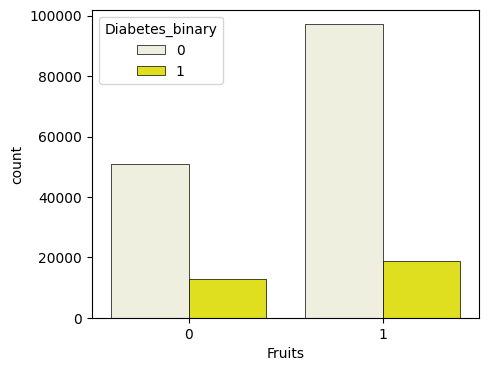

In [53]:
plt.figure(figsize=(5,4))
sns.countplot(data=Higher50, x="Fruits", hue="Diabetes_binary", lw=0.5, ec="black", color="yellow")

<AxesSubplot: xlabel='Fruits', ylabel='count'>

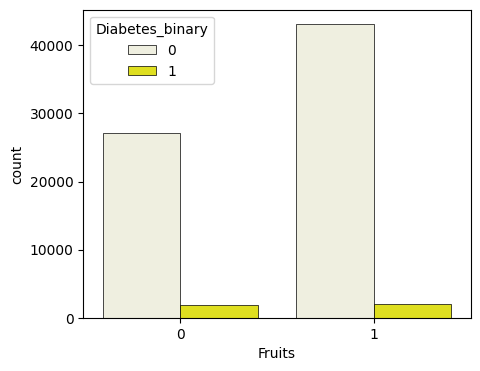

In [54]:
plt.figure(figsize=(5,4))
sns.countplot(data=Under50, x="Fruits", hue="Diabetes_binary", lw=0.5, ec="black", color="yellow")

In [55]:
len(data[(data['Diabetes_binary'] == 1) & (data['Fruits'] == 1) & (data['Veggies'] == 1) & (data['Age'] < 7 )])

1745

In [56]:
len(data[(data['Diabetes_binary'] == 1) & (data['Fruits'] == 1) & (data['Veggies'] == 1) & (data['Age'] >= 7 )])

15612

### AnyHealthcare & NoDocbcCost

<AxesSubplot: xlabel='AnyHealthcare', ylabel='count'>

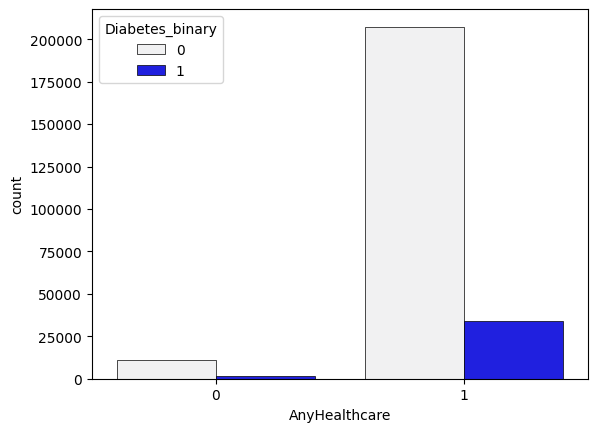

In [57]:
sns.countplot(data=data, x="AnyHealthcare", hue="Diabetes_binary", lw=0.5, ec="black", color="blue")

<AxesSubplot: xlabel='AnyHealthcare', ylabel='NoDocbcCost'>

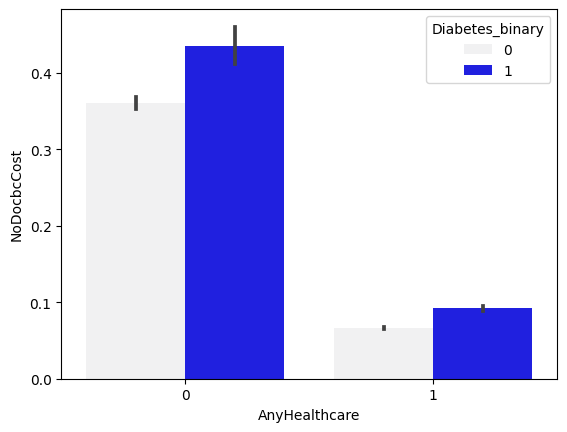

In [58]:
sns.barplot(x='AnyHealthcare',y='NoDocbcCost',data=data, hue='Diabetes_binary', color='blue')

#### if have Diabetes:

In [59]:
len(data[(data['Diabetes_binary'] == 1) & (data['AnyHealthcare'] == 1) & (data['NoDocbcCost'] == 1)])

3123

In [60]:
len(data[(data['Diabetes_binary'] == 1) & (data['AnyHealthcare'] == 0) & (data['NoDocbcCost'] == 0)])

803

#### if have not Diabetes:

In [61]:
len(data[(data['Diabetes_binary'] == 0) & (data['AnyHealthcare'] == 1) & (data['NoDocbcCost'] == 1)])

13652

In [62]:
len(data[(data['Diabetes_binary'] == 0) & (data['AnyHealthcare'] == 0) & (data['NoDocbcCost'] == 0)])

7035

#### Considering Age:

<AxesSubplot: xlabel='AnyHealthcare', ylabel='count'>

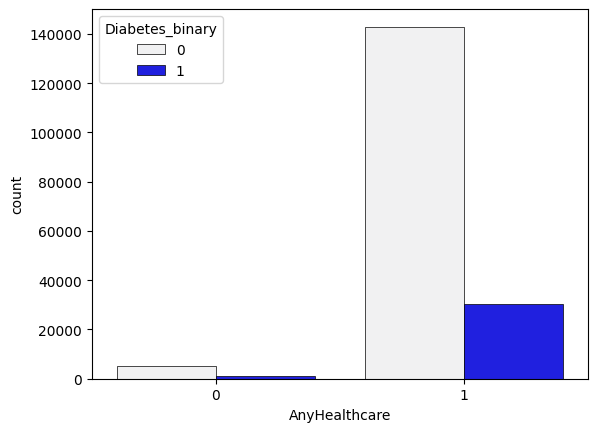

In [63]:
sns.countplot(data=Higher50, x="AnyHealthcare", hue="Diabetes_binary", lw=0.5, ec="black", color="blue")

<AxesSubplot: xlabel='AnyHealthcare', ylabel='count'>

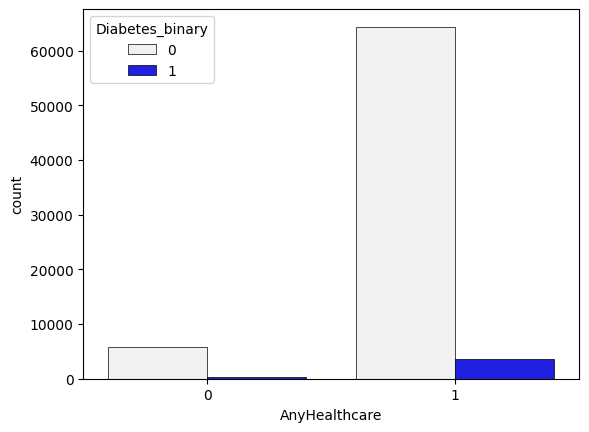

In [64]:
sns.countplot(data=Under50, x="AnyHealthcare", hue="Diabetes_binary", lw=0.5, ec="black", color="blue")

In [65]:
len(data[(data['Diabetes_binary'] == 1) & (data['AnyHealthcare'] == 1) & (data['NoDocbcCost'] == 1) & (data['Age'] < 7 )])

613

In [66]:
len(data[(data['Diabetes_binary'] == 1) & (data['AnyHealthcare'] == 1) & (data['NoDocbcCost'] == 1) & (data['Age'] >= 7 )])

2510

### GenHlth & PhysHlth & MentHlth

<AxesSubplot: xlabel='GenHlth', ylabel='count'>

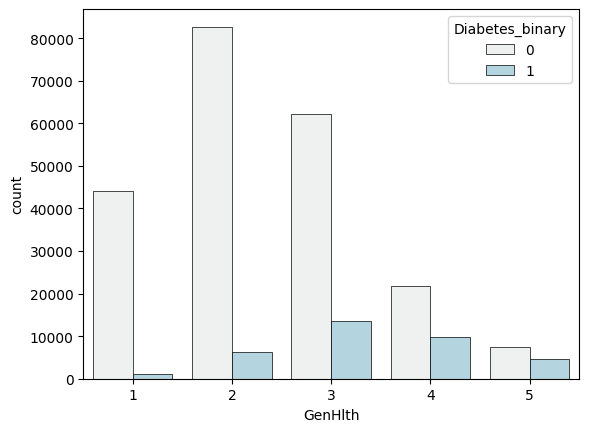

In [67]:
sns.countplot(data=data, x="GenHlth", hue="Diabetes_binary", lw=0.5, ec="black", color="lightblue")

<AxesSubplot: xlabel='GenHlth', ylabel='PhysHlth'>

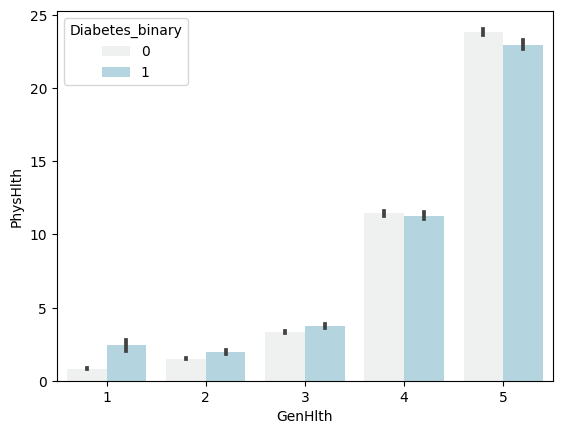

In [68]:
sns.barplot(x='GenHlth',y='PhysHlth',data=data, hue='Diabetes_binary', color='lightblue')

<AxesSubplot: xlabel='GenHlth', ylabel='MentHlth'>

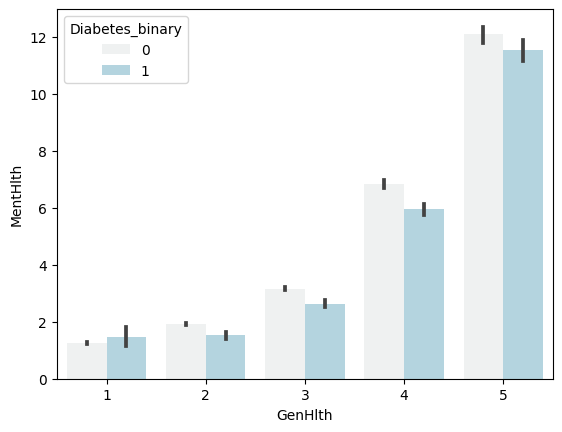

In [69]:
sns.barplot(x='GenHlth',y='MentHlth',data=data, hue='Diabetes_binary', color='lightblue')

#### if have Diabetes:

In [70]:
len(data[(data['Diabetes_binary'] == 1) & (data['GenHlth'] == 1) & (data['MentHlth'] == 1)])

19

In [71]:
len(data[(data['Diabetes_binary'] == 1) & (data['GenHlth'] == 0) & (data['MentHlth'] == 0)])

0

#### if have not Diabetes:

In [72]:
len(data[(data['Diabetes_binary'] == 0) & (data['GenHlth'] == 1) & (data['MentHlth'] == 1)])

1510

In [73]:
len(data[(data['Diabetes_binary'] == 0) & (data['GenHlth'] == 0) & (data['MentHlth'] == 0)])

0

#### Considering Age:

<AxesSubplot: xlabel='GenHlth', ylabel='count'>

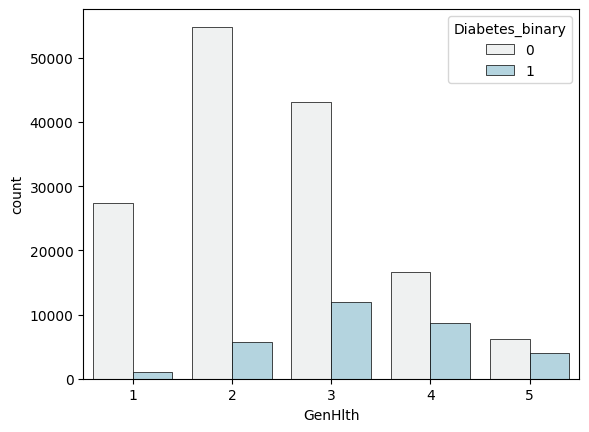

In [74]:
sns.countplot(data=Higher50, x="GenHlth", hue="Diabetes_binary", lw=0.5, ec="black", color="lightblue")

<AxesSubplot: xlabel='GenHlth', ylabel='count'>

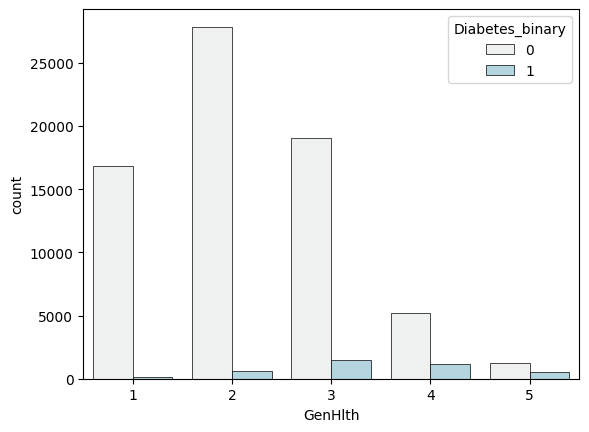

In [75]:
sns.countplot(data=Under50, x="GenHlth", hue="Diabetes_binary", lw=0.5, ec="black", color="lightblue")

In [76]:
len(data[(data['Diabetes_binary'] == 1) & (data['GenHlth'] == 1) & (data['MentHlth'] == 1) & (data['Age'] < 7 )])

3

In [77]:
len(data[(data['Diabetes_binary'] == 1) & (data['GenHlth'] == 1) & (data['MentHlth'] == 1) & (data['Age'] >= 7 )])

16

### Income & Education

<AxesSubplot: xlabel='Income', ylabel='count'>

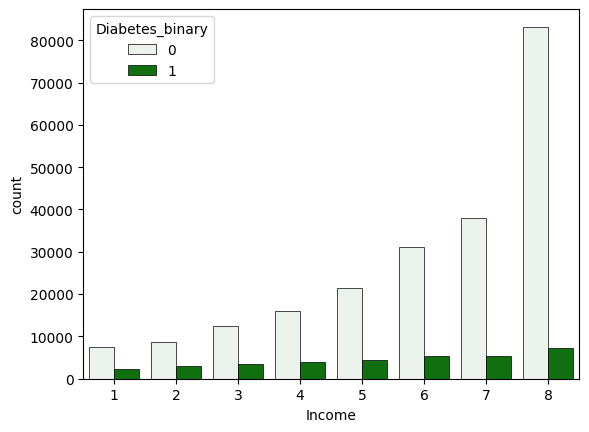

In [78]:
sns.countplot(data=data, x="Income", hue="Diabetes_binary", lw=0.5, ec="black", color="green")

<AxesSubplot: xlabel='Income', ylabel='NoDocbcCost'>

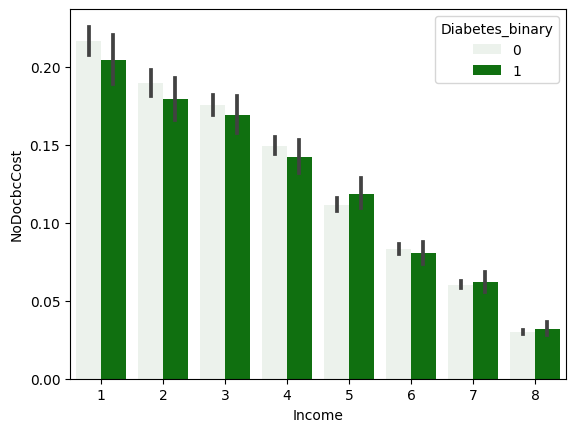

In [79]:
sns.barplot(x='Income',y='NoDocbcCost',data=data, hue='Diabetes_binary', color='green')

<AxesSubplot: xlabel='Education', ylabel='Income'>

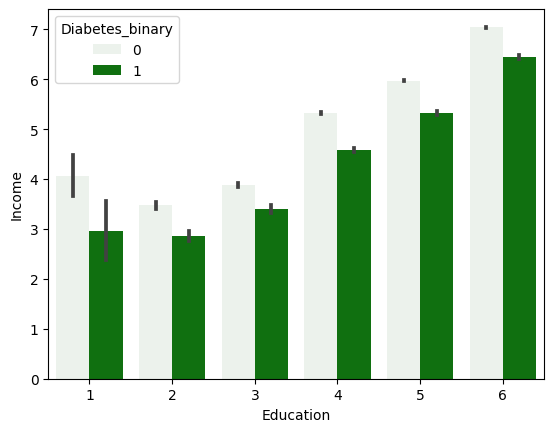

In [80]:
sns.barplot(x='Education',y='Income',data=data, hue='Diabetes_binary', color='green')

#### if have Diabetes:

In [81]:
len(data[(data['Diabetes_binary'] == 1) & (data['Education'] == 1) & (data['Income'] == 1)])

14

In [82]:
len(data[(data['Diabetes_binary'] == 1) & (data['Education'] == 0) & (data['Income'] == 0)])

0

#### if have not Diabetes:

In [83]:
len(data[(data['Diabetes_binary'] == 0) & (data['Education'] == 1) & (data['Income'] == 1)])

23

In [84]:
len(data[(data['Diabetes_binary'] == 0) & (data['Education'] == 0) & (data['Income'] == 0)])

0

#### Considering Age:

<AxesSubplot: xlabel='Income', ylabel='count'>

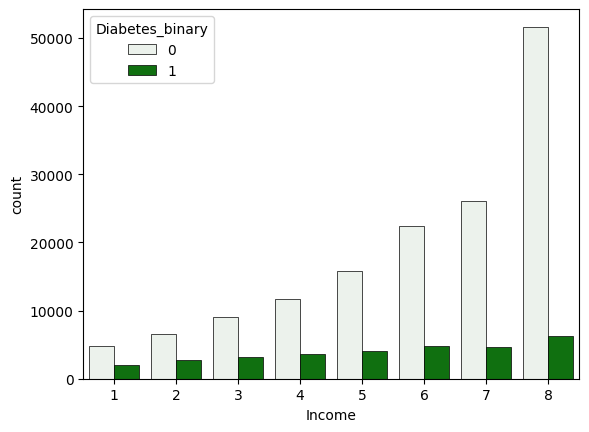

In [85]:
sns.countplot(data=Higher50, x="Income", hue="Diabetes_binary", lw=0.5, ec="black", color="green")

<AxesSubplot: xlabel='Income', ylabel='count'>

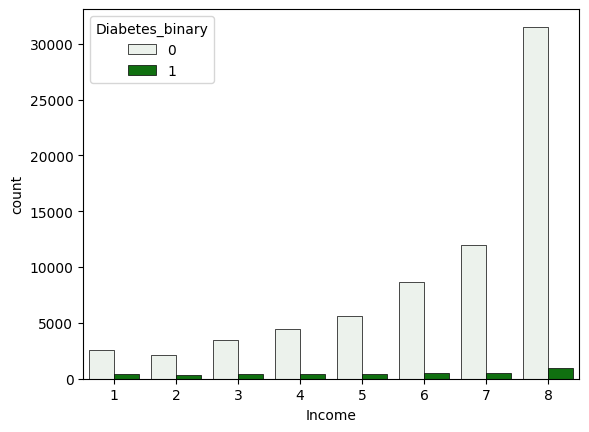

In [86]:
sns.countplot(data=Under50, x="Income", hue="Diabetes_binary", lw=0.5, ec="black", color="green")

In [87]:
len(data[(data['Diabetes_binary'] == 1) & (data['Education'] >= 3) & (data['Income'] >= 4) & (data['Age'] < 7 )])

2775

In [88]:
len(data[(data['Diabetes_binary'] == 1) & (data['Education'] >= 3) & (data['Income'] >= 4) & (data['Age'] >= 7 )])

23147

### Sex & Age

<AxesSubplot: xlabel='Sex', ylabel='count'>

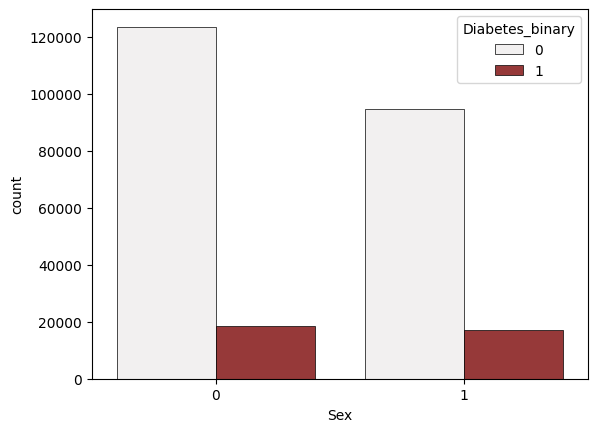

In [89]:
sns.countplot(data=data, x="Sex", hue="Diabetes_binary", lw=0.5, ec="black", color="brown")

<AxesSubplot: xlabel='Age', ylabel='count'>

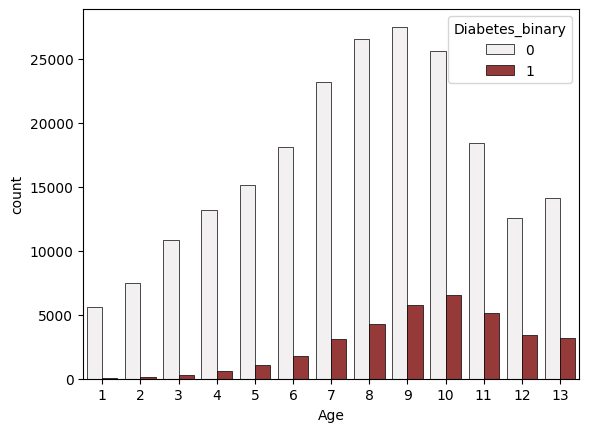

In [90]:
sns.countplot(data=data, x="Age", hue="Diabetes_binary", lw=0.5, ec="black", color="brown")

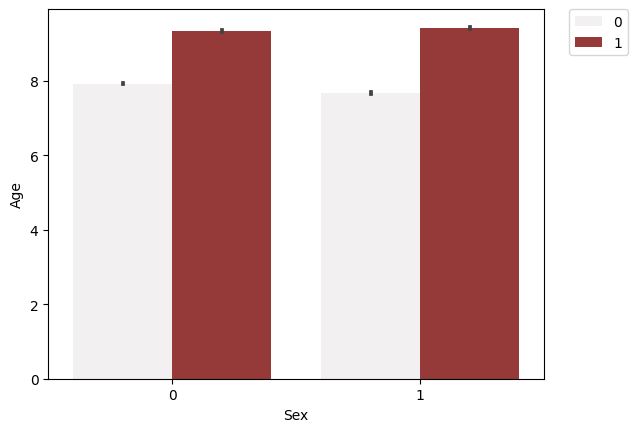

In [91]:
sns.barplot(x='Sex',y='Age',data=data, hue='Diabetes_binary', color='brown')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#### if have Diabetes:

In [92]:
len(data[(data['Diabetes_binary'] == 1) & (data['Sex'] == 1) & (data['Age'] < 7)])

1782

In [93]:
len(data[(data['Diabetes_binary'] == 1) & (data['Sex'] == 0) & (data['Age'] >= 7)])

16242

#### if have not Diabetes:

In [94]:
len(data[(data['Diabetes_binary'] == 0) & (data['Sex'] == 1) & (data['Age'] < 7)])

31851

In [95]:
len(data[(data['Diabetes_binary'] == 0) & (data['Sex'] == 0) & (data['Age'] >= 7)])

85145

#### Considering Age:

<AxesSubplot: xlabel='Sex', ylabel='count'>

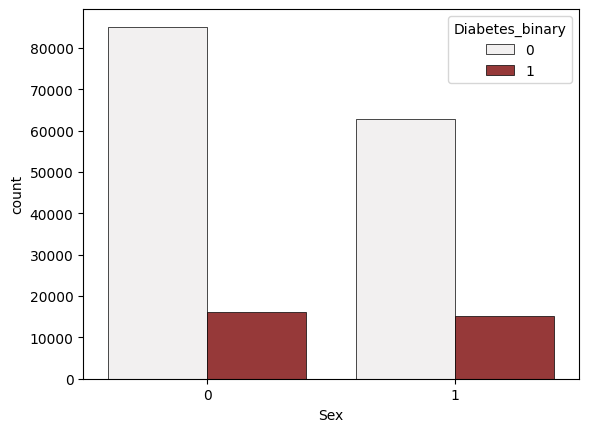

In [96]:
sns.countplot(data=Higher50, x="Sex", hue="Diabetes_binary", lw=0.5, ec="black", color="brown")

<AxesSubplot: xlabel='Sex', ylabel='count'>

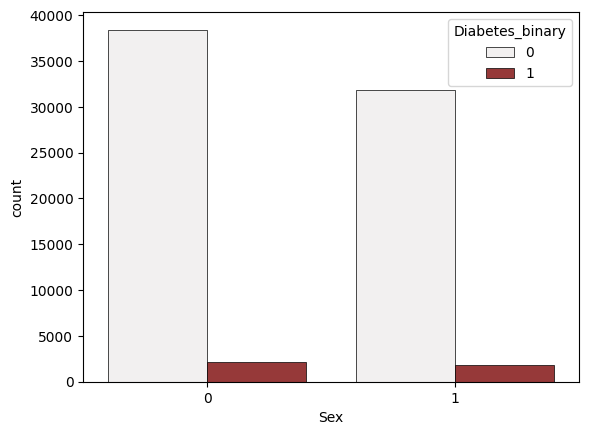

In [97]:
sns.countplot(data=Under50, x="Sex", hue="Diabetes_binary", lw=0.5, ec="black", color="brown")

In [98]:
len(data[(data['Diabetes_binary'] == 1) & (data['Sex'] == 1) & (data['Age'] < 7 )])

1782

In [99]:
len(data[(data['Diabetes_binary'] == 1) & (data['Sex'] == 1) & (data['Age'] >= 7 )])

15153

## Regressions

In [100]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split

In [101]:
X=data.drop("Diabetes_binary",axis=1)
y=data["Diabetes_binary"]

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

### Imbalance Data ?!

In [103]:
imbal = data['Diabetes_binary'].value_counts()
imbalance = (imbal[1]/imbal[0])
imbalance

0.16188958201654347

#### we have Imbalance data. so we can check which method is better for balancing data.

### Checking Methods for balancing data

In [104]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler 
from sklearn.linear_model import LogisticRegression

### Comparing balance methods

#### overSampleing

In [105]:
lg_over = LogisticRegression(solver='lbfgs', max_iter=500)

ROS = RandomOverSampler(random_state=42)

X_tr_rs, y_tr_rs = ROS.fit_resample(X_train, y_train)

lg_over.fit(X_tr_rs, y_tr_rs)
print("Training Score after balance the labels (RandomOverSampler):",lg_over.score(X_tr_rs, y_tr_rs))

Training Score after balance the labels (RandomOverSampler): 0.7448421896013964


#### underSampling

In [106]:
lg2 = LogisticRegression(solver='lbfgs', max_iter=500)

RUS = RandomUnderSampler(random_state=42)

X_tr_us, y_tr_us = RUS.fit_resample(X_train, y_train)

lg2.fit(X_tr_us, y_tr_us)
print("Training Score after balance the labels (RandomUnderSampler)",lg2.score(X_tr_us, y_tr_us))

Training Score after balance the labels (RandomUnderSampler) 0.7472437874437237


#### Smote

In [107]:
lg = LogisticRegression(solver='lbfgs', max_iter=500)

SMT = SMOTE(random_state=42)

X_tr_smt, y_tr_smt = SMT.fit_resample(X_train, y_train)

lg.fit(X_tr_smt, y_tr_smt)
y_pred=lg.predict(X_test)

print("Training Score after balance the labels (Smote):",lg.score(X_tr_smt, y_tr_smt))

Training Score after balance the labels (Smote): 0.7406644347154262


#### balanced weighted

In [108]:
lg3 = LogisticRegression(solver='lbfgs', max_iter=500,class_weight='balanced')

lg3.fit(X_train, y_train)
print("Training Score after Balanced class weights Logistic Regression",lg3.score(X_train, y_train))

Training Score after Balanced class weights Logistic Regression 0.7309799747713654


#### According to the above reviews, undersampling is the best method to balance this dataset.

### UnderSampling

<AxesSubplot: title={'center': 'Label Distribution'}>

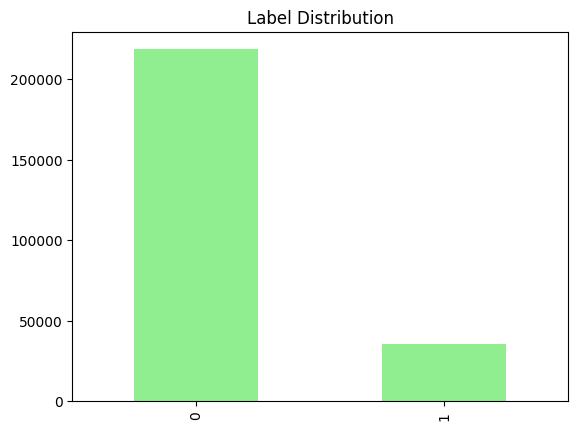

In [109]:
data['Diabetes_binary'].value_counts().plot(kind = 'bar', title = 'Label Distribution', color='lightgreen')

<AxesSubplot: title={'center': 'Label Distribution after Undersampling'}>

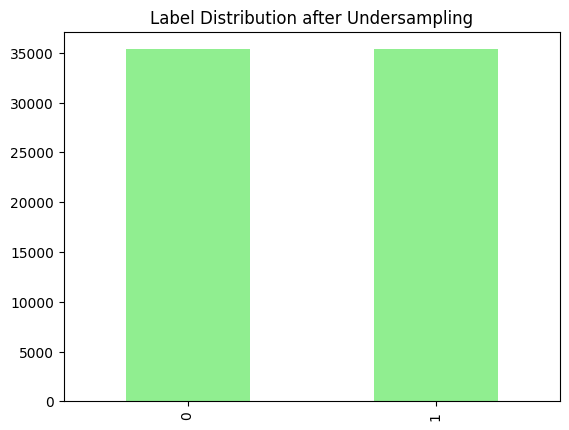

In [110]:
noDiabetes = data[data['Diabetes_binary'] == 0]
Diabetes = data[data['Diabetes_binary'] == 1]

noDiabetes_under = noDiabetes.sample(len(Diabetes), replace=True)

data_dec = pd.concat([noDiabetes_under, Diabetes], axis=0)

data_dec['Diabetes_binary'].value_counts().plot(kind='bar', title='Label Distribution after Undersampling', color='lightgreen')

#### We balanced the data. But we must use the same wild data and correct samples to draw the correct conclusions so that the conclusions are closer to reality.

</br>

## Logistic Reg

In [111]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, plot_roc_curve, auc, precision_recall_curve, plot_precision_recall_curve, average_precision_score
from sklearn.metrics import precision_recall_curve,plot_precision_recall_curve,plot_roc_curve
from sklearn.metrics import plot_confusion_matrix
import plotly.express as px
from sklearn.metrics import mean_squared_error

In [112]:
log_model = LogisticRegression(solver='lbfgs', max_iter=800)

In [113]:
log_model.fit(X_train,y_train)

LogisticRegression(max_iter=800)

### Logistic: Test,Cross Validation, Train

In [114]:
# 60% of data is training data, set aside other 40%
X_train, X_OTHER, y_train, y_OTHER = train_test_split(X, y, test_size=0.4, random_state=101)

# Each is 20% of the original data size
X_eval, X_test, y_eval, y_test = train_test_split(X_OTHER, y_OTHER, test_size=0.5, random_state=101)

In [115]:
y_eval_pred = log_model.predict(X_eval)

In [117]:
mean_squared_error(y_eval,y_eval_pred)

0.13722011983601387

In [118]:
y_final_test_pred = log_model.predict(X_test)

In [119]:
mean_squared_error(y_test,y_final_test_pred)

0.1351111636707663

In [120]:
y_final_train_pred = log_model.predict(X_train)

In [121]:
mean_squared_error(y_train,y_final_train_pred)

0.13634631556816987

### Logistic: CV Confusion Matrix

In [186]:
y_pred = log_model.predict(X_eval)

In [187]:
confusion_matrix(y_eval,y_pred)

array([[42696,   922],
       [ 6040,  1078]], dtype=int64)

C:\Users\Amirhosain\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



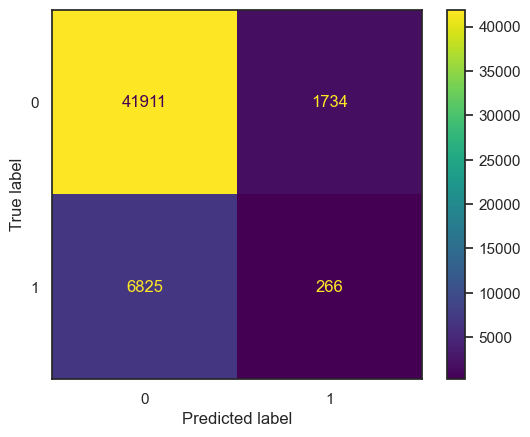

In [188]:
plot_confusion_matrix(log_model,X_eval,y_test)

In [189]:
y_prob = log_model.predict_proba(X_eval)[:,1]

print(classification_report(y_eval,y_pred))

Logauc_eval = roc_auc_score(y_eval, y_prob)
Logacc_eval = accuracy_score(y_eval, y_pred)

print('ROC AUC score: ', Logauc_eval)
print('Accuracy Score: ', Logacc_eval)

              precision    recall  f1-score   support

           0       0.88      0.98      0.92     43618
           1       0.54      0.15      0.24      7118

    accuracy                           0.86     50736
   macro avg       0.71      0.57      0.58     50736
weighted avg       0.83      0.86      0.83     50736

ROC AUC score:  0.8210496046347667
Accuracy Score:  0.8627798801639861


C:\Users\Amirhosain\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.



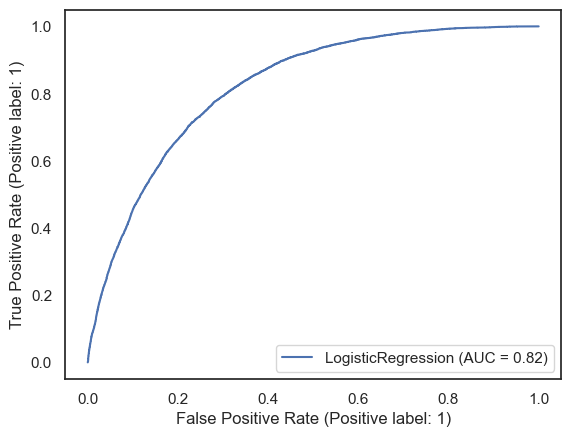

In [190]:
plot_roc_curve(log_model,X_eval,y_eval)

C:\Users\Amirhosain\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.



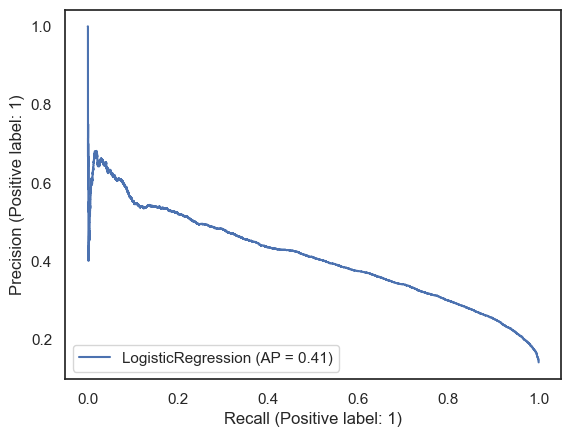

In [191]:
plot_precision_recall_curve(log_model,X_eval,y_eval)

### Logistic: Train Confusion Matrix

In [128]:
y_pred = log_model.predict(X_train)

In [129]:
confusion_matrix(y_train,y_pred)

array([[128233,   2838],
       [ 17915,   3222]], dtype=int64)

C:\Users\Amirhosain\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


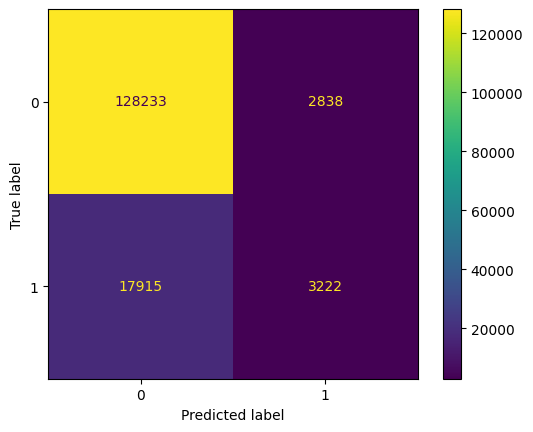

In [130]:
plot_confusion_matrix(log_model,X_train,y_train)

In [132]:
y_prob = log_model.predict_proba(X_train)[:,1]

print(classification_report(y_train,y_pred))

Logauc_train = roc_auc_score(y_train, y_prob)
Logacc_train = accuracy_score(y_train, y_pred)

print('ROC AUC score: ', Logauc_train)
print('Accuracy Score: ', Logacc_train)

              precision    recall  f1-score   support

           0       0.88      0.98      0.93    131071
           1       0.53      0.15      0.24     21137

    accuracy                           0.86    152208
   macro avg       0.70      0.57      0.58    152208
weighted avg       0.83      0.86      0.83    152208

ROC AUC score:  0.8217276627576666
Accuracy Score:  0.8636536844318301


C:\Users\Amirhosain\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


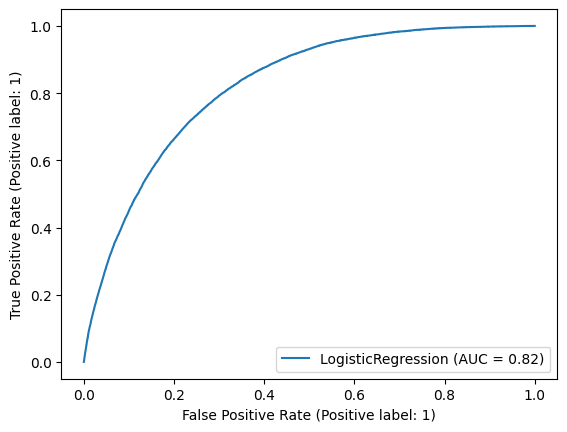

In [133]:
plot_roc_curve(log_model,X_train,y_train)

C:\Users\Amirhosain\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


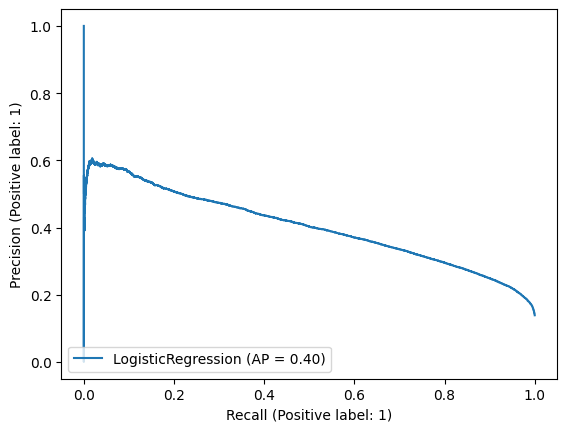

In [134]:
plot_precision_recall_curve(log_model,X_train,y_train)

### Logistic: Feature Importances

In [135]:
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': log_model.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)

fig = px.bar(importances, x="Attribute", y="Importance", text_auto=True)
fig.update_layout(barmode='relative', title_text='Feature importances obtained from Logistic')
fig.show()

## SVM

#### Waited for 2-3 hours for this SVM method, but this method was not executed! Considering the concept of SVM and the large volume of data, it is probably necessary to wait a long time for its implementation, and its operation is a very heavy operation.

## Decision Tree

In [136]:
from sklearn.tree import DecisionTreeClassifier
import plotly.express as px

In [137]:
dt_model = DecisionTreeClassifier()

In [138]:
dt_model.fit(X_train,y_train)

DecisionTreeClassifier()

### Decision Tree: Test,Cross Validation, Train

In [139]:
# 60% of data is training data, set aside other 40%
X_train, X_OTHER, y_train, y_OTHER = train_test_split(X, y, test_size=0.4, random_state=101)

# Each is 20% of the original data size
X_eval, X_test, y_eval, y_test = train_test_split(X_OTHER, y_OTHER, test_size=0.5, random_state=101)

In [140]:
y_eval_pred = dt_model.predict(X_eval)

In [142]:
mean_squared_error(y_eval,y_eval_pred)

0.20368180384736675

In [143]:
y_final_test_pred = dt_model.predict(X_test)

In [144]:
mean_squared_error(y_test,y_final_test_pred)

0.20478555660674866

In [145]:
y_final_train_pred = dt_model.predict(X_train)

In [146]:
mean_squared_error(y_train,y_final_train_pred)

0.004730368968779565

### Decision Tree: CV Confusion matrix

In [192]:
y_pred = dt_model.predict(X_eval)

In [193]:
confusion_matrix(y_eval,y_pred)

array([[38090,  5528],
       [ 4806,  2312]], dtype=int64)

C:\Users\Amirhosain\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



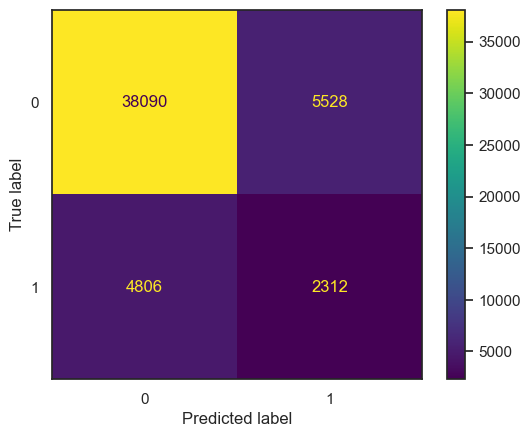

In [194]:
plot_confusion_matrix(dt_model,X_eval,y_eval)

In [195]:
y_prob = dt_model.predict_proba(X_eval)[:,1]

print(classification_report(y_eval, y_pred))

DTauc_eval = roc_auc_score(y_eval, y_prob)
DTacc_eval = accuracy_score(y_eval, y_pred)

print('ROC AUC score: ',DTauc_eval)
print('Accuracy Score: ', DTacc_eval)

              precision    recall  f1-score   support

           0       0.89      0.87      0.88     43618
           1       0.29      0.32      0.31      7118

    accuracy                           0.80     50736
   macro avg       0.59      0.60      0.59     50736
weighted avg       0.80      0.80      0.80     50736

ROC AUC score:  0.5981769041476866
Accuracy Score:  0.7963181961526332


</br>

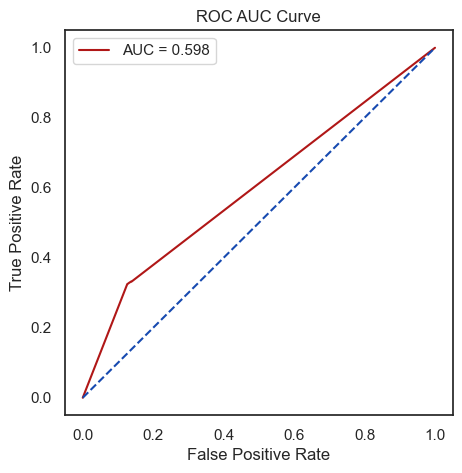

C:\Users\Amirhosain\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.



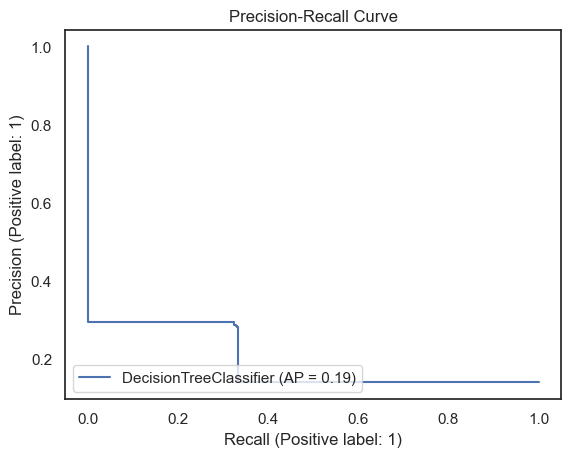

In [196]:
# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_eval, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

#accuracy
acc = accuracy_score(y_eval, y_pred)*100

sns.set_theme(style = 'white')
plt.figure(figsize = (5, 5))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC AUC Curve')
plt.legend()
plt.show()

#Precision Recall Curve
average_precision = average_precision_score(y_eval, y_prob)
disp = plot_precision_recall_curve(dt_model, X_eval, y_eval)
plt.title('Precision-Recall Curve')
plt.show()

### Decision Tree: Train Confusion matrix

In [152]:
y_pred = dt_model.predict(X_train)

In [153]:
confusion_matrix(y_train,y_pred)

array([[131053,     18],
       [   702,  20435]], dtype=int64)

C:\Users\Amirhosain\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



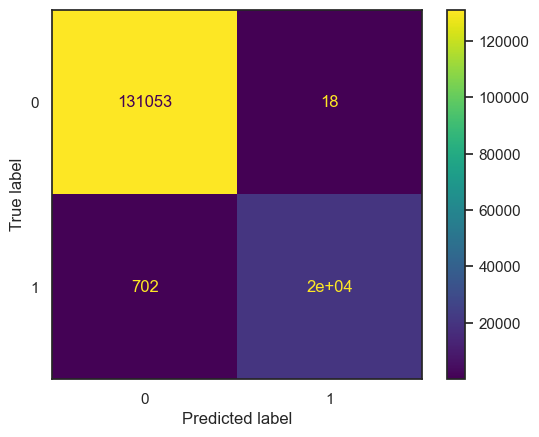

In [154]:
plot_confusion_matrix(dt_model,X_train,y_train)

In [155]:
y_prob = dt_model.predict_proba(X_train)[:,1]

print(classification_report(y_train, y_pred))

DTauc_train = roc_auc_score(y_train, y_prob)
DTacc_train = accuracy_score(y_train, y_pred)

print('ROC AUC score: ', DTauc_train)
print('Accuracy Score: ', DTacc_train)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    131071
           1       1.00      0.97      0.98     21137

    accuracy                           1.00    152208
   macro avg       1.00      0.98      0.99    152208
weighted avg       1.00      1.00      1.00    152208

ROC AUC score:  0.9998934993441224
Accuracy Score:  0.9952696310312205


</br>

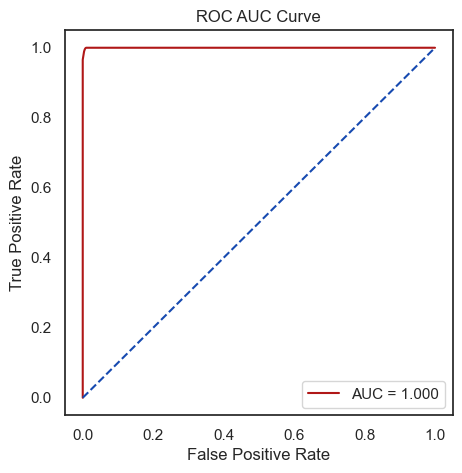

C:\Users\Amirhosain\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.



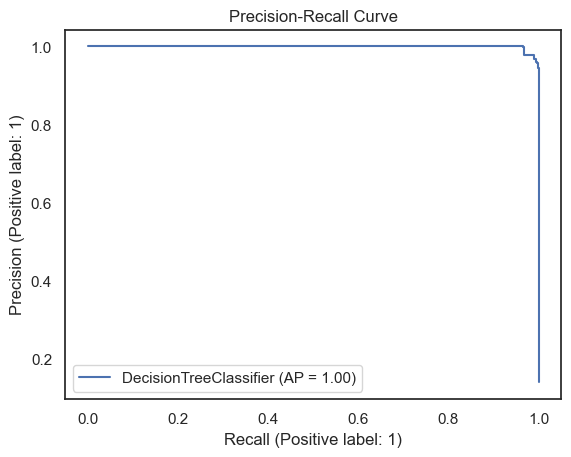

In [156]:
# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

#accuracy
acc = accuracy_score(y_train, y_pred)*100

sns.set_theme(style = 'white')
plt.figure(figsize = (5, 5))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC AUC Curve')
plt.legend()
plt.show()

#Precision Recall Curve
average_precision = average_precision_score(y_train, y_prob)
disp = plot_precision_recall_curve(dt_model, X_train, y_train)
plt.title('Precision-Recall Curve')
plt.show()

### Decision Tree: Feature Importances

In [157]:
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': dt_model.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)

fig = px.bar(importances, x="Attribute", y="Importance", text_auto=True)
fig.update_layout(barmode='relative', title_text='Feature importances obtained from Trees')
fig.show()

## XGBoost

In [158]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, plot_roc_curve, auc, precision_recall_curve, plot_precision_recall_curve, average_precision_score
import plotly.express as px

### XGBoost: Test,Cross Validation, Train

In [163]:
XGB_model = XGBClassifier(eval_metric= 'error', learning_rate= 0.1)
XGB_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='error', feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [164]:
# 60% of data is training data, set aside other 40%
X_train, X_OTHER, y_train, y_OTHER = train_test_split(X, y, test_size=0.4, random_state=101)

# Each is 20% of the original data size
X_eval, X_test, y_eval, y_test = train_test_split(X_OTHER, y_OTHER, test_size=0.5, random_state=101)

In [165]:
y_eval_pred = XGB_model.predict(X_eval)

In [167]:
mean_squared_error(y_eval,y_eval_pred)

0.13396799116997793

In [168]:
y_final_test_pred = XGB_model.predict(X_test)

In [169]:
mean_squared_error(y_test,y_final_test_pred)

0.13339640491958374

In [170]:
y_final_train_pred = XGB_model.predict(X_train)

In [171]:
mean_squared_error(y_train,y_final_train_pred)

0.12894197414064965

### XGBoost: CV Confusion matrix

In [197]:
y_pred = XGB_model.predict(X_eval)

In [198]:
confusion_matrix(y_eval,y_pred)

array([[42768,   850],
       [ 5947,  1171]], dtype=int64)

C:\Users\Amirhosain\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



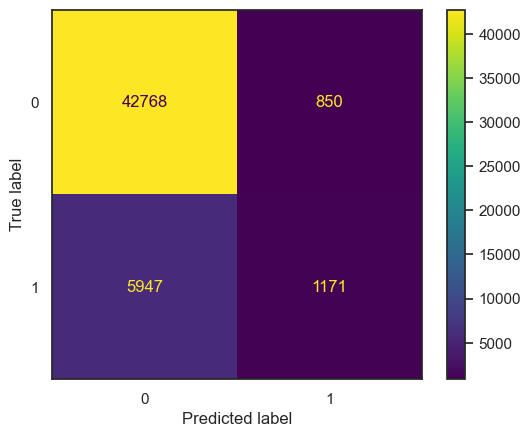

In [199]:
plot_confusion_matrix(XGB_model,X_eval,y_eval)

In [200]:
y_pred = XGB_model.predict(X_eval)
y_prob = XGB_model.predict_proba(X_eval)[:,1]

print(classification_report(y_eval, y_pred))

XGBauc_eval = roc_auc_score(y_eval, y_prob)
XGBacc_eval = accuracy_score(y_eval, y_pred)

print('ROC AUC score: ' ,XGBauc_eval)
print('Accuracy Score: ',XGBacc_eval)

              precision    recall  f1-score   support

           0       0.88      0.98      0.93     43618
           1       0.58      0.16      0.26      7118

    accuracy                           0.87     50736
   macro avg       0.73      0.57      0.59     50736
weighted avg       0.84      0.87      0.83     50736

ROC AUC score:  0.829497367055428
Accuracy Score:  0.8660320088300221


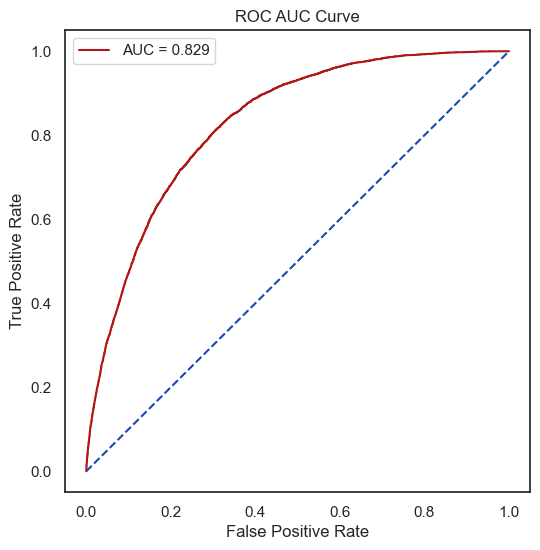

C:\Users\Amirhosain\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.



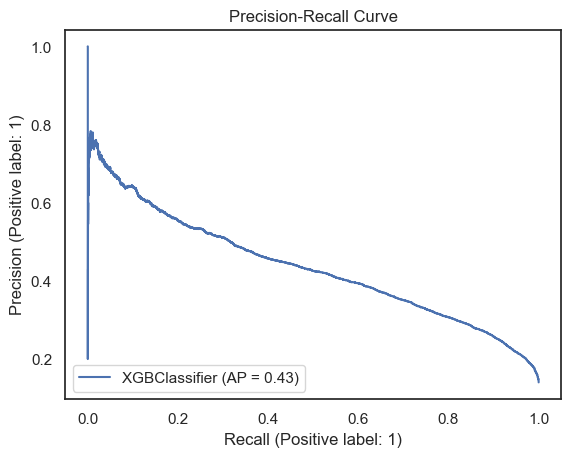

In [201]:
# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_eval, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

#accuracy
acc = accuracy_score(y_eval, y_pred)*100

sns.set_theme(style = 'white')
plt.figure(figsize = (6, 6))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC AUC Curve')
plt.legend()
plt.show()

#Precision Recall Curve
average_precision = average_precision_score(y_eval, y_prob)
disp = plot_precision_recall_curve(XGB_model, X_eval, y_eval)
plt.title('Precision-Recall Curve')
plt.show()

### XGBoost: Train Confusion matrix

In [177]:
y_pred = XGB_model.predict(X_train)

In [178]:
confusion_matrix(y_train,y_pred)

array([[128831,   2240],
       [ 17386,   3751]], dtype=int64)

C:\Users\Amirhosain\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



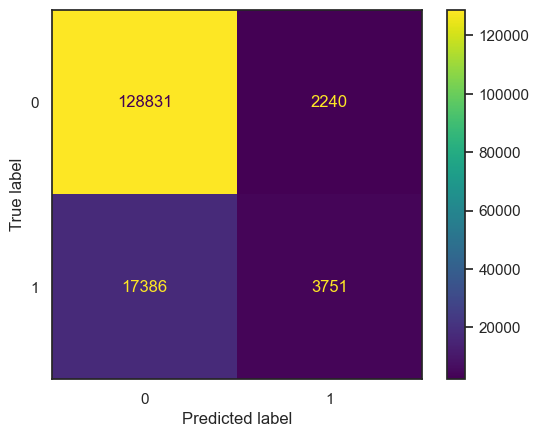

In [179]:
plot_confusion_matrix(XGB_model,X_train,y_train)

In [180]:
y_pred = XGB_model.predict(X_train)
y_prob = XGB_model.predict_proba(X_train)[:,1]

print(classification_report(y_train, y_pred))

XGBauc_train = roc_auc_score(y_train, y_prob)
XGBacc_train = accuracy_score(y_train, y_pred)

print('ROC AUC score: ' ,XGBauc_train)
print('Accuracy Score: ',XGBacc_train)

              precision    recall  f1-score   support

           0       0.88      0.98      0.93    131071
           1       0.63      0.18      0.28     21137

    accuracy                           0.87    152208
   macro avg       0.75      0.58      0.60    152208
weighted avg       0.85      0.87      0.84    152208

ROC AUC score:  0.8442666325030431
Accuracy Score:  0.8710580258593503


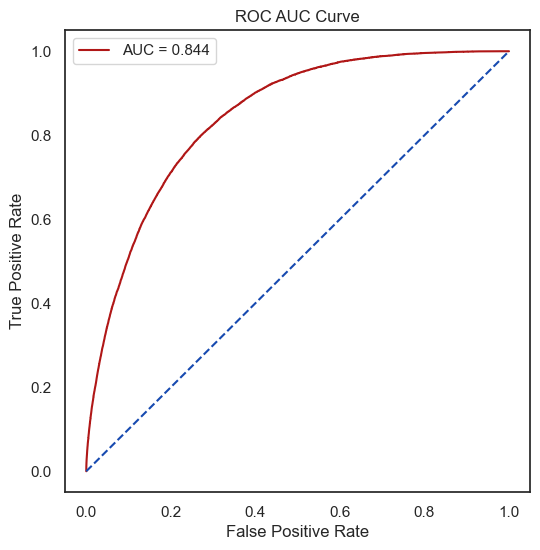

C:\Users\Amirhosain\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.



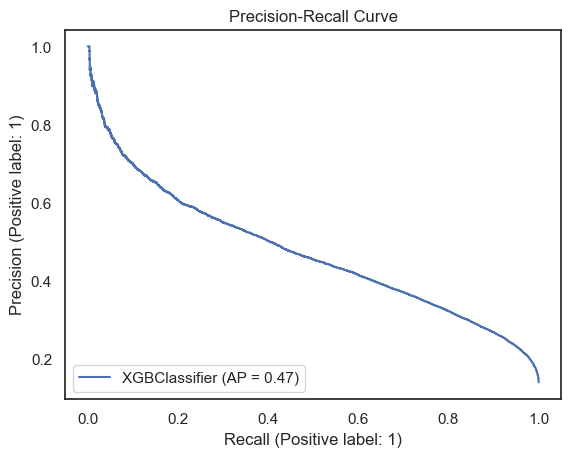

In [181]:
# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

#accuracy
acc = accuracy_score(y_train, y_pred)*100

sns.set_theme(style = 'white')
plt.figure(figsize = (6, 6))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC AUC Curve')
plt.legend()
plt.show()

#Precision Recall Curve
average_precision = average_precision_score(y_train, y_prob)
disp = plot_precision_recall_curve(XGB_model, X_train, y_train)
plt.title('Precision-Recall Curve')
plt.show()

### XGBoost: Feature Importances

In [182]:
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': XGB_model.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)

fig = px.bar(importances, x="Attribute", y="Importance", text_auto=True)
fig.update_layout(barmode='relative', title_text='Feature importances obtained from XGBoost')
fig.show()

## Comparison

### Now the results obtained from the statistics will be compared :

In [206]:
models = ['Logistic', 'Decision Tree', 'XGB']
acc_eval = [ Logacc_eval, DTacc_eval, XGBacc_eval]
acc_train = [ Logacc_train, DTacc_train, XGBacc_train]
subtracted = np.subtract(acc_train, acc_eval)
# AUC = [ Logauc_eval, DTacc_eval, XGBauc_eval]
# compare_table = pd.DataFrame({'Model':models, 'Accuracy Score':accuracy, 'Roc AUC Score':AUC})
compare_table = pd.DataFrame({'Model':models, 'Acc for CV':acc_eval, 'Acc for Train':acc_train, 'Sub': subtracted})
compare_table.sort_values(by=['Sub'], inplace=True, ascending=True)
compare_table

Model  Acc for CV  Acc for Train       Sub
0       Logistic    0.862780       0.863654  0.000874
2            XGB    0.866032       0.871058  0.005026
1  Decision Tree    0.796318       0.995270  0.198951

### According to the above statistics for CV and Train Accuracy, the Logistic and XGBoost method seem to fit. and between theese two, XGB is better. but Decision Tree have overfit. To fix overfit, train part in DT will increase and will see the result:

In [207]:
dt_model = DecisionTreeClassifier()

In [208]:
dt_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [209]:
# 70% of data is training data, set aside other 40%
X_train, X_OTHER, y_train, y_OTHER = train_test_split(X, y, test_size=0.7, random_state=101)

# Each is 20% of the original data size
X_eval, X_test, y_eval, y_test = train_test_split(X_OTHER, y_OTHER, test_size=0.5, random_state=101)

### Decision Tree: CV Acc - 70% Train

In [230]:
y_pred = dt_model.predict(X_eval)

In [231]:
y_prob = dt_model.predict_proba(X_eval)[:,1]

print(classification_report(y_eval, y_pred))

DTacc_eval = accuracy_score(y_eval, y_pred)

print('Accuracy Score: ', DTacc_eval)

              precision    recall  f1-score   support

           0       0.93      0.93      0.93     76447
           1       0.57      0.60      0.58     12341

    accuracy                           0.88     88788
   macro avg       0.75      0.76      0.76     88788
weighted avg       0.88      0.88      0.88     88788

Accuracy Score:  0.880817227553273


### Decision Tree: Train Acc - 70% Train

In [232]:
y_pred = dt_model.predict(X_train)

In [233]:
y_prob = dt_model.predict_proba(X_train)[:,1]

print(classification_report(y_train, y_pred))

DTacc_train = accuracy_score(y_train, y_pred)

print('Accuracy Score: ', DTacc_train)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     65523
           1       1.00      0.97      0.98     10581

    accuracy                           1.00     76104
   macro avg       1.00      0.98      0.99     76104
weighted avg       1.00      1.00      1.00     76104

Accuracy Score:  0.9951645117208031


In [234]:
models = ['Logistic', 'Decision Tree', 'XGB']
acc_eval = [ Logacc_eval, DTacc_eval, XGBacc_eval]
acc_train = [ Logacc_train, DTacc_train, XGBacc_train]
subtracted = np.subtract(acc_train, acc_eval)
# AUC = [ Logauc_eval, DTacc_eval, XGBauc_eval]
# compare_table = pd.DataFrame({'Model':models, 'Accuracy Score':accuracy, 'Roc AUC Score':AUC})
compare_table = pd.DataFrame({'Model':models, 'Acc for CV':acc_eval, 'Acc for Train':acc_train, 'Sub': subtracted})
compare_table.sort_values(by=['Sub'], inplace=True, ascending=True)
compare_table

Model  Acc for CV  Acc for Train       Sub
0       Logistic    0.862780       0.863654  0.000874
2            XGB    0.866032       0.871058  0.005026
1  Decision Tree    0.880817       0.995165  0.114347

### Now it can be seen that less Overfit has happened for Decision Tree. Lets up train to 80%:

In [236]:
# 80% of data is training data, set aside other 40%
X_train, X_OTHER, y_train, y_OTHER = train_test_split(X, y, test_size=0.8, random_state=101)

# Each is 20% of the original data size
X_eval, X_test, y_eval, y_test = train_test_split(X_OTHER, y_OTHER, test_size=0.5, random_state=101)

### Decision Tree: CV Acc - 70% Train

In [237]:
y_pred = dt_model.predict(X_eval)

In [238]:
y_prob = dt_model.predict_proba(X_eval)[:,1]

print(classification_report(y_eval, y_pred))

DTacc_eval = accuracy_score(y_eval, y_pred)

print('Accuracy Score: ', DTacc_eval)

              precision    recall  f1-score   support

           0       0.94      0.94      0.94     87262
           1       0.62      0.65      0.63     14210

    accuracy                           0.90    101472
   macro avg       0.78      0.79      0.79    101472
weighted avg       0.90      0.90      0.90    101472

Accuracy Score:  0.8950942131819615


### Decision Tree: Train Acc - 70% Train

In [239]:
y_pred = dt_model.predict(X_train)

In [240]:
y_prob = dt_model.predict_proba(X_train)[:,1]

print(classification_report(y_train, y_pred))

DTacc_train = accuracy_score(y_train, y_pred)

print('Accuracy Score: ', DTacc_train)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     43739
           1       1.00      0.97      0.98      6997

    accuracy                           1.00     50736
   macro avg       1.00      0.98      0.99     50736
weighted avg       1.00      1.00      1.00     50736

Accuracy Score:  0.9953287606433302


In [241]:
models = ['Logistic', 'Decision Tree', 'XGB']
acc_eval = [ Logacc_eval, DTacc_eval, XGBacc_eval]
acc_train = [ Logacc_train, DTacc_train, XGBacc_train]
subtracted = np.subtract(acc_train, acc_eval)
# AUC = [ Logauc_eval, DTacc_eval, XGBauc_eval]
# compare_table = pd.DataFrame({'Model':models, 'Accuracy Score':accuracy, 'Roc AUC Score':AUC})
compare_table = pd.DataFrame({'Model':models, 'Acc for CV':acc_eval, 'Acc for Train':acc_train, 'Sub': subtracted})
compare_table.sort_values(by=['Sub'], inplace=True, ascending=True)
compare_table

Model  Acc for CV  Acc for Train       Sub
0       Logistic    0.862780       0.863654  0.000874
2            XGB    0.866032       0.871058  0.005026
1  Decision Tree    0.895094       0.995329  0.100235

### The overfit in 80% of train Even less than 70% of train !

## Conclusion

### Based on the above statistics and comparisons, it can be concluded that increasing theTrain parts will decrease the overfit
### Among the above methods, DT had higher accuracy, but overfit occurred in it.
### Between the two logistic and XGB methods, where there was no overfit and underfit, the XGB method had a higher accuracy than the logistic method. So XGB will be the best of bests method.
### Between logistics and DT, the DT method had a much higher accuracy than the logistics, but it also had a high overfit.
### According to the observations and correctable overfit of DT, logistics can be chosen as the worst of worse method.